# Exploratory Data Analysis for test data

### Importación de datos y librerías

In [1]:
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import os
from IPython.core.display import display, HTML

C:\Users\henry\AppData\Local\Temp\ipykernel_16060\1582991288.py:6: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [2]:
data_path = "C:/Users/henry/Desktop/python/jbook_rna/datos/Single-cell RNASeq data from Mouse Brain"
data_path2 = "C:/Users/henry/Desktop/python/jbook_rna/datos/Theory - Intro to single-cell RNAseq Images"

In [3]:
test_data = os.path.join(data_path2, "test_adata.h5ad")
adata_test = sc.read_h5ad(test_data)


## Exploration and observation of the data

In [4]:
print(adata_test)


AnnData object with n_obs × n_vars = 30474 × 13553
    obs: 'batch_indices', 'n_genes', 'percent_mito', 'leiden_subclusters', 'cell_types', 'tissue', 'batch'
    obsm: 'isotypes_htos', 'protein_expression'


In [5]:
adata_test.shape

(30474, 13553)

# 📌 Explanation of the Variables in `adata_test.obs`

| **Column**             | **Description** |
|------------------------|----------------|
| **`batch_indices`**    | Numerical index of the experimental batch the cell belongs to. Helps identify samples from different experiments. |
| **`n_genes`**          | Number of detected genes in each cell. Indicates gene expression diversity. |
| **`percent_mito`**     | Percentage of mitochondrial genes in the cell. A high value may indicate cellular stress or dead cells. |
| **`leiden_subclusters`** | Cluster assigned to the cell using the **Leiden algorithm**, which detects subpopulations within the data. |
| **`cell_types`**       | The assigned cell type, such as **NKT (Natural Killer T cells)**, **CD8 T cells**, **B cells**, etc. |
| **`tissue`**          | The tissue the cell comes from, such as **Spleen** or **Lymph Node**. |
| **`batch`**           | Identifier of the original experimental batch, e.g., **SLN111-D1**. It may represent samples from different experiments or patients. |

---

## 📌 Example of Data Interpretation

Each row represents **an individual cell** with its characteristics:

### **Example 1**
- **Cell ID**: `AAACCCAAGGGTAATT-1`
- **Leiden cluster**: `12,0`
- **Cell type**: **NKT (Natural Killer T cell)**
- **Tissue**: **Spleen**
- **Experimental batch**: **SLN111-D1**

### **Example 2**
- **Cell ID**: `AAACCCACAGATACCT-1`
- **Leiden cluster**: `4`
- **Cell type**: **Mature B (mature B cell)**
- **Tissue**: **Lymph Node**
- **Experimental batch**: **SLN111-D1**


In [6]:
adata_test.obs.info

<bound method DataFrame.info of                     batch_indices  n_genes  percent_mito leiden_subclusters  \
index                                                                         
AAACCCAAGGGTAATT-1              0     3137      0.062138               12,0   
AAACCCAAGGTAAACT-1              0     2256      0.057545                  6   
AAACCCACACTAGGTT-1              0     1367      0.058373                  3   
AAACCCACAGATACCT-1              0     1567      0.065386                  4   
AAACCCACAGGAATAT-1              0     1895      0.059644                  0   
...                           ...      ...           ...                ...   
TTTGTTGGTGGGCTCT-2              1      785      0.106437                  7   
TTTGTTGTCAAATAGG-2              1      979      0.050457                  2   
TTTGTTGTCACGAGGA-2              1      747      0.070362                  0   
TTTGTTGTCTCGACCT-2              1      920      0.044903                 13   
TTTGTTGTCTTGGTCC-2  

In [7]:
print(adata_test.obs.head())


                    batch_indices  n_genes  percent_mito leiden_subclusters  \
index                                                                         
AAACCCAAGGGTAATT-1              0     3137      0.062138               12,0   
AAACCCAAGGTAAACT-1              0     2256      0.057545                  6   
AAACCCACACTAGGTT-1              0     1367      0.058373                  3   
AAACCCACAGATACCT-1              0     1567      0.065386                  4   
AAACCCACAGGAATAT-1              0     1895      0.059644                  0   

                        cell_types      tissue      batch  
index                                                      
AAACCCAAGGGTAATT-1             NKT      Spleen  SLN111-D1  
AAACCCAAGGTAAACT-1    CD122+ CD8 T      Spleen  SLN111-D1  
AAACCCACACTAGGTT-1  Transitional B      Spleen  SLN111-D1  
AAACCCACAGATACCT-1        Mature B  Lymph_Node  SLN111-D1  
AAACCCACAGGAATAT-1           CD4 T  Lymph_Node  SLN111-D1  


In [8]:
print(adata_test.var.head())


Empty DataFrame
Columns: []
Index: [Mrpl15, Lypla1, Tcea1, Atp6v1h, Rb1cc1]


In [9]:
# 4️⃣ 🧬 Número de genes y células
print(f"Number of cells: {adata_test.n_obs}")
print(f"Number of genes: {adata_test.n_vars}")

Number of cells: 30474
Number of genes: 13553


### Univariate Analysis

In [10]:
display(HTML(adata_test.obs.describe(include='all').to_html()))


,batch_indices,n_genes,percent_mito,leiden_subclusters,cell_types,tissue,batch
count,30474.000000,30474.000000,30474.000000,30474,30474,30474,30474
unique,NaN,NaN,NaN,34,27,2,4
top,NaN,NaN,NaN,0,Mature B,Spleen,SLN111-D1
freq,NaN,NaN,NaN,5179,9936,16423,8736
mean,0.442115,1437.539575,0.061535,NaN,NaN,NaN,NaN
std,0.496646,578.810732,0.017958,NaN,NaN,NaN,NaN
min,0.000000,203.000000,0.000000,NaN,NaN,NaN,NaN
25%,0.000000,985.000000,0.050233,NaN,NaN,NaN,NaN
50%,0.000000,1381.000000,0.059756,NaN,NaN,NaN,NaN
75%,1.000000,1759.000000,0.071133,NaN,NaN,NaN,NaN


# genes

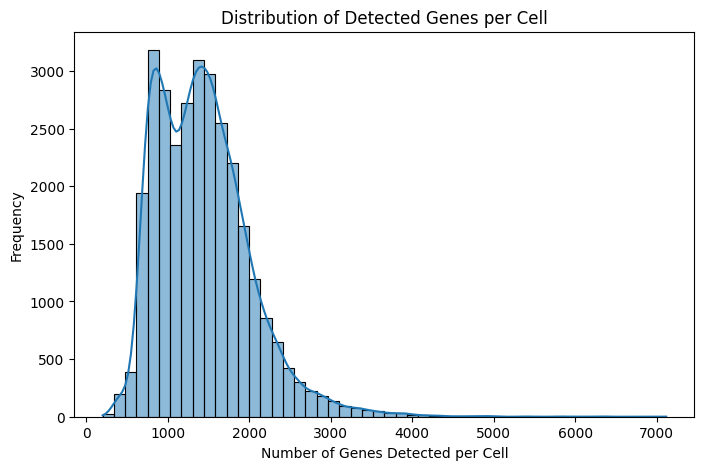

In [11]:
# Plot histogram
plt.figure(figsize=(8, 5))
sns.histplot(adata_test.obs["n_genes"], bins=50, kde=True)
plt.xlabel("Number of Genes Detected per Cell")
plt.ylabel("Frequency")
plt.title("Distribution of Detected Genes per Cell")
plt.show()

cell typed

C:\Users\henry\AppData\Local\Temp\ipykernel_16060\767820716.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cell_counts.values, y=cell_counts.index, ax=axes[0], palette="coolwarm", order=cell_counts.index)
C:\Users\henry\AppData\Local\Temp\ipykernel_16060\767820716.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=percentages.values, y=percentages.index, ax=axes[1], palette="coolwarm", order = percentages.index)


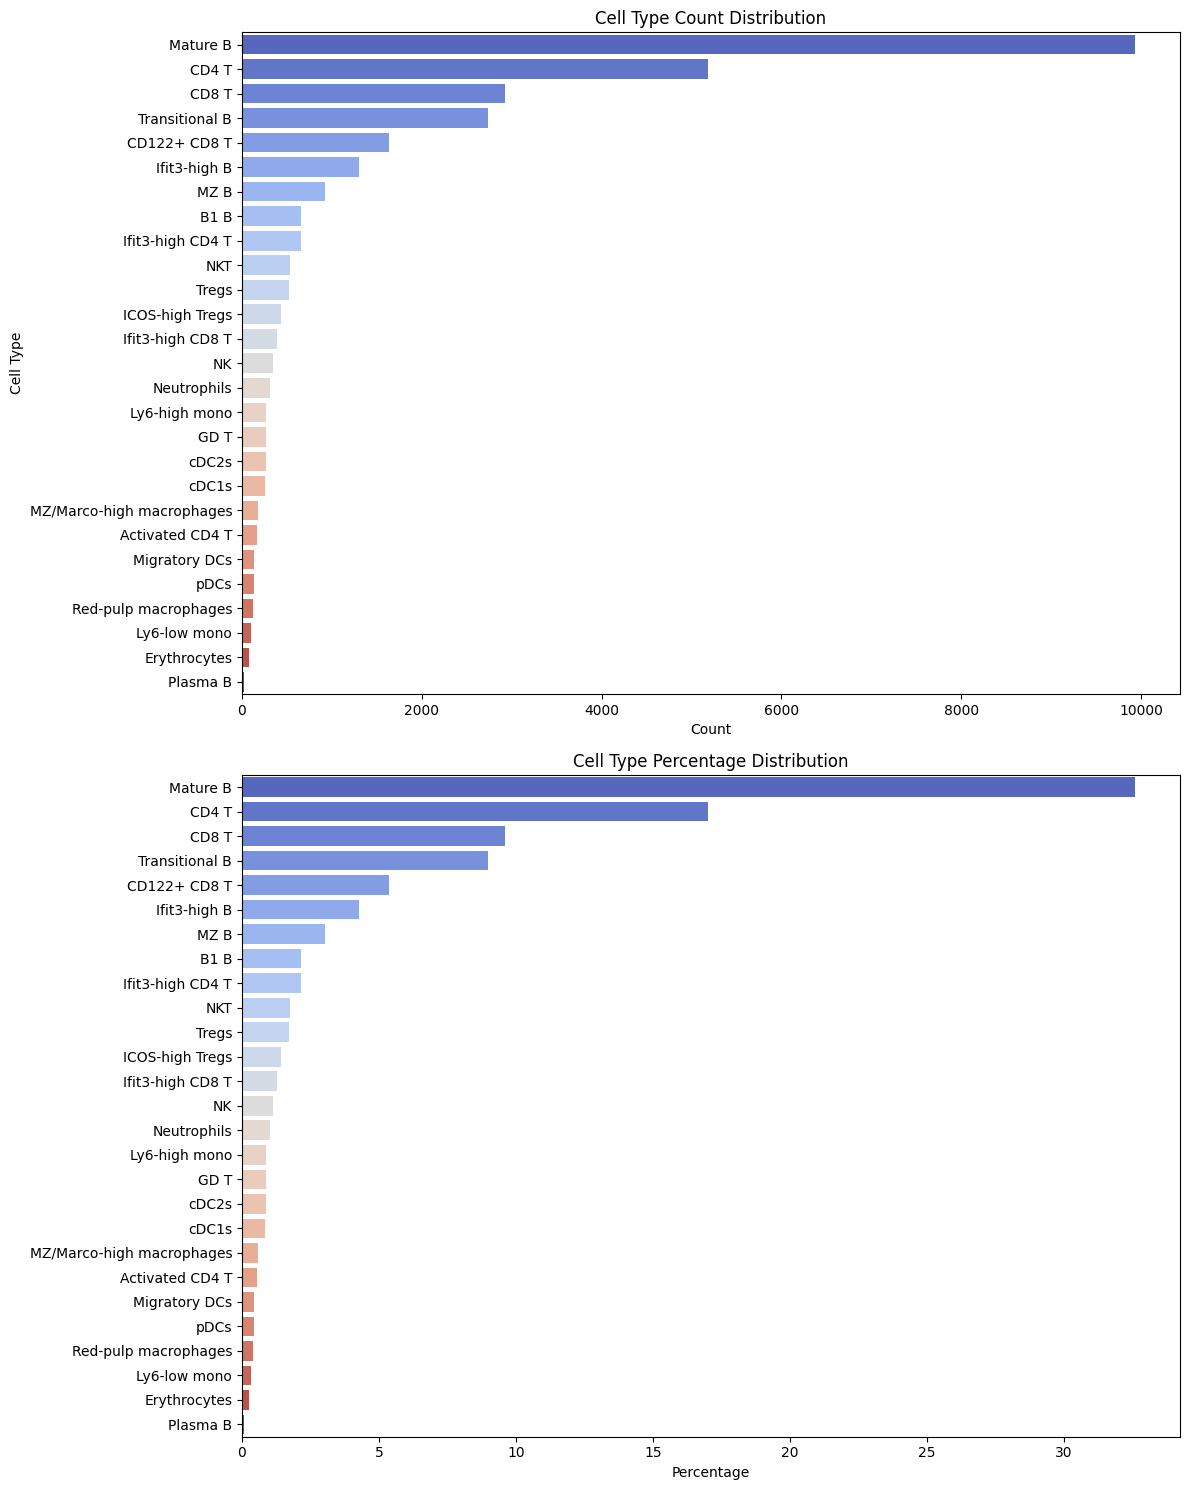

In [12]:
cell_counts = adata_test.obs['cell_types'].value_counts()
percentages = (cell_counts / cell_counts.sum()) * 100
fig, axes = plt.subplots(2, 1, figsize=(12, 15))


# Left plot: Bar count of cell types
sns.barplot(x=cell_counts.values, y=cell_counts.index, ax=axes[0], palette="coolwarm", order=cell_counts.index)
axes[0].set_xlabel("Count")
axes[0].set_ylabel("Cell Type")
axes[0].set_title("Cell Type Count Distribution")

# Right plot: Percentage barplot in descending order with coolwarm
sns.barplot(x=percentages.values, y=percentages.index, ax=axes[1], palette="coolwarm", order = percentages.index)
axes[1].set_xlabel("Percentage")
axes[1].set_ylabel("")
axes[1].set_title("Cell Type Percentage Distribution")

plt.tight_layout()
plt.show()

closer

C:\Users\henry\AppData\Local\Temp\ipykernel_16060\3906686963.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cell_counts.values, y=cell_counts.index, ax=axes[0], palette="coolwarm", order=cell_counts.index)


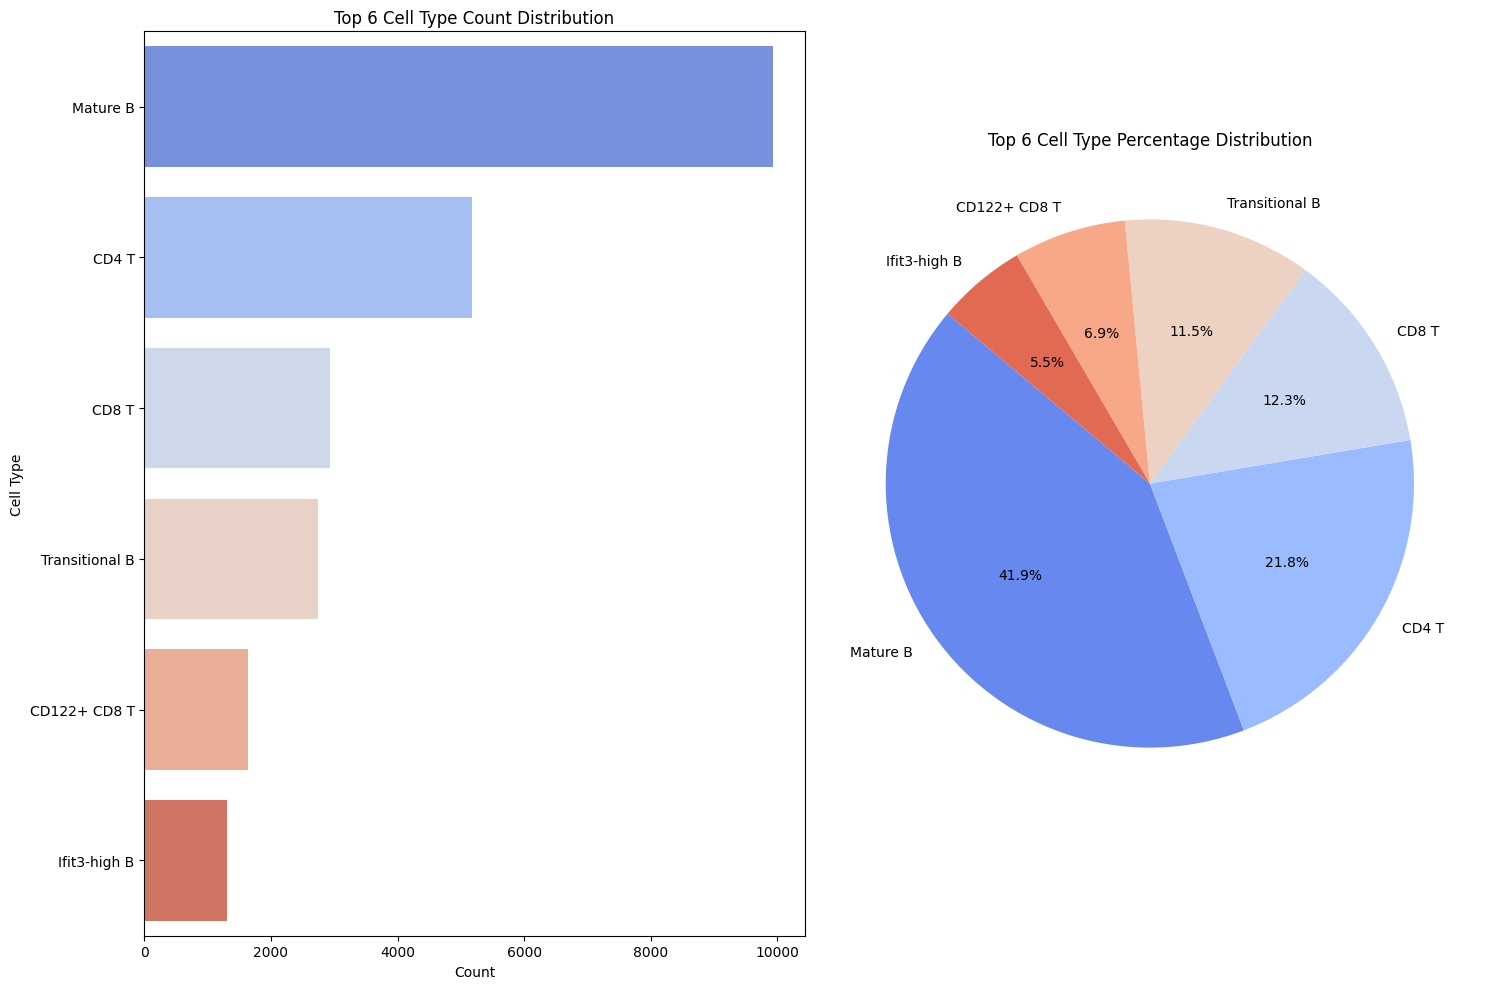

In [13]:
# Get the top 6 most frequent cell types
cell_counts = adata_test.obs['cell_types'].value_counts().head(6)
percentages = (cell_counts / cell_counts.sum()) * 100  # Convert to percentage

# Create a 2x1 subplot
fig, axes = plt.subplots(1, 2, figsize=(15, 10))

# Top plot: Bar count of top 6 cell types
sns.barplot(x=cell_counts.values, y=cell_counts.index, ax=axes[0], palette="coolwarm", order=cell_counts.index)
axes[0].set_xlabel("Count")
axes[0].set_ylabel("Cell Type")
axes[0].set_title("Top 6 Cell Type Count Distribution")

# Bottom plot: Pie chart of top 6 cell type percentages
axes[1].pie(percentages, labels=percentages.index, autopct='%1.1f%%', colors=sns.color_palette("coolwarm", 6), startangle=140)
axes[1].set_title("Top 6 Cell Type Percentage Distribution")

plt.tight_layout()
plt.show()

mito

C:\Users\henry\AppData\Local\Temp\ipykernel_16060\2797744079.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x=adata_test.obs["percent_mito"], ax=axes[0], orient="h", palette="coolwarm")


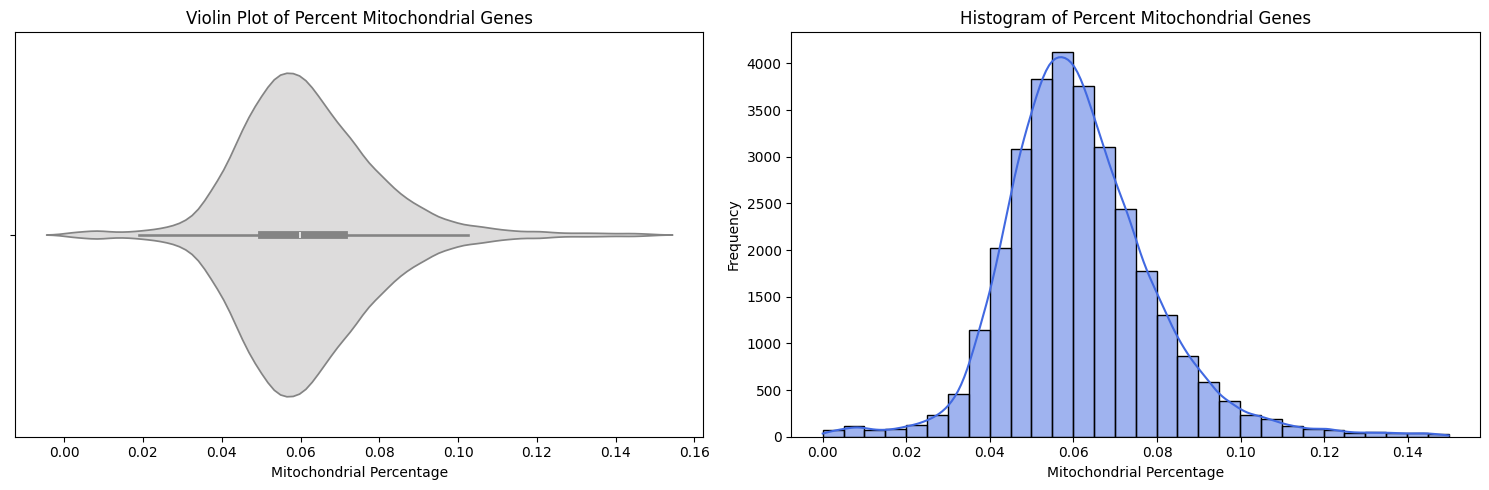

In [14]:
# Create a 1x2 subplot
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Left plot: Horizontal violin plot
sns.violinplot(x=adata_test.obs["percent_mito"], ax=axes[0], orient="h", palette="coolwarm")
axes[0].set_xlabel("Mitochondrial Percentage")
axes[0].set_title("Violin Plot of Percent Mitochondrial Genes")

# Right plot: Histogram
sns.histplot(adata_test.obs["percent_mito"], bins=30, kde=True, ax=axes[1], color="royalblue")
axes[1].set_xlabel("Mitochondrial Percentage")
axes[1].set_ylabel("Frequency")
axes[1].set_title("Histogram of Percent Mitochondrial Genes")

plt.tight_layout()
plt.show()

tissue

C:\Users\henry\AppData\Local\Temp\ipykernel_16060\3198639555.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tissue_counts.values, y=tissue_counts.index, ax=axes[0], palette="coolwarm", order=tissue_counts.index)


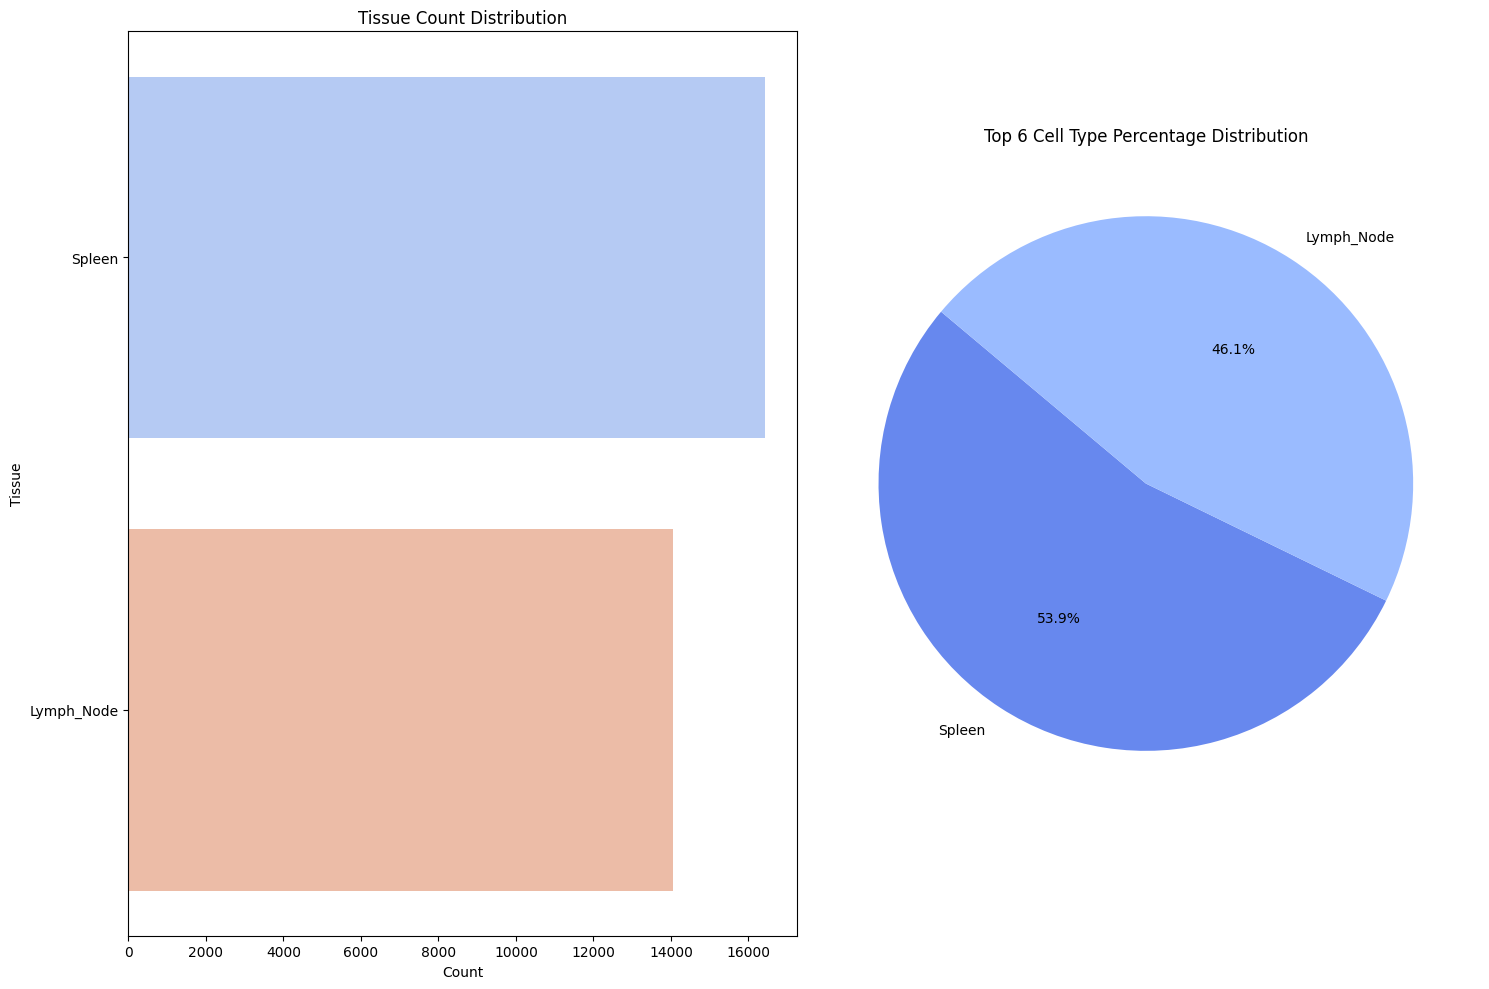

In [15]:
tissue_counts = adata_test.obs['tissue'].value_counts()
percentages = (tissue_counts / tissue_counts.sum()) * 100
fig, axes = plt.subplots(1, 2, figsize=(15, 10))


# Left plot: Bar count of cell types
sns.barplot(x=tissue_counts.values, y=tissue_counts.index, ax=axes[0], palette="coolwarm", order=tissue_counts.index)
axes[0].set_xlabel("Count")
axes[0].set_ylabel("Tissue")
axes[0].set_title("Tissue Count Distribution")

# Bottom plot: Pie chart of top 6 cell type percentages
axes[1].pie(percentages, labels=percentages.index, autopct='%1.1f%%', colors=sns.color_palette("coolwarm", 6), startangle=140)
axes[1].set_title("Top 6 Cell Type Percentage Distribution")

plt.tight_layout()
plt.show()

### Análisis bivariado

C:\Users\henry\AppData\Local\Temp\ipykernel_16060\1705930934.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="tissue", y="n_genes", data=adata_test.obs, palette="coolwarm", ax=axes[1])


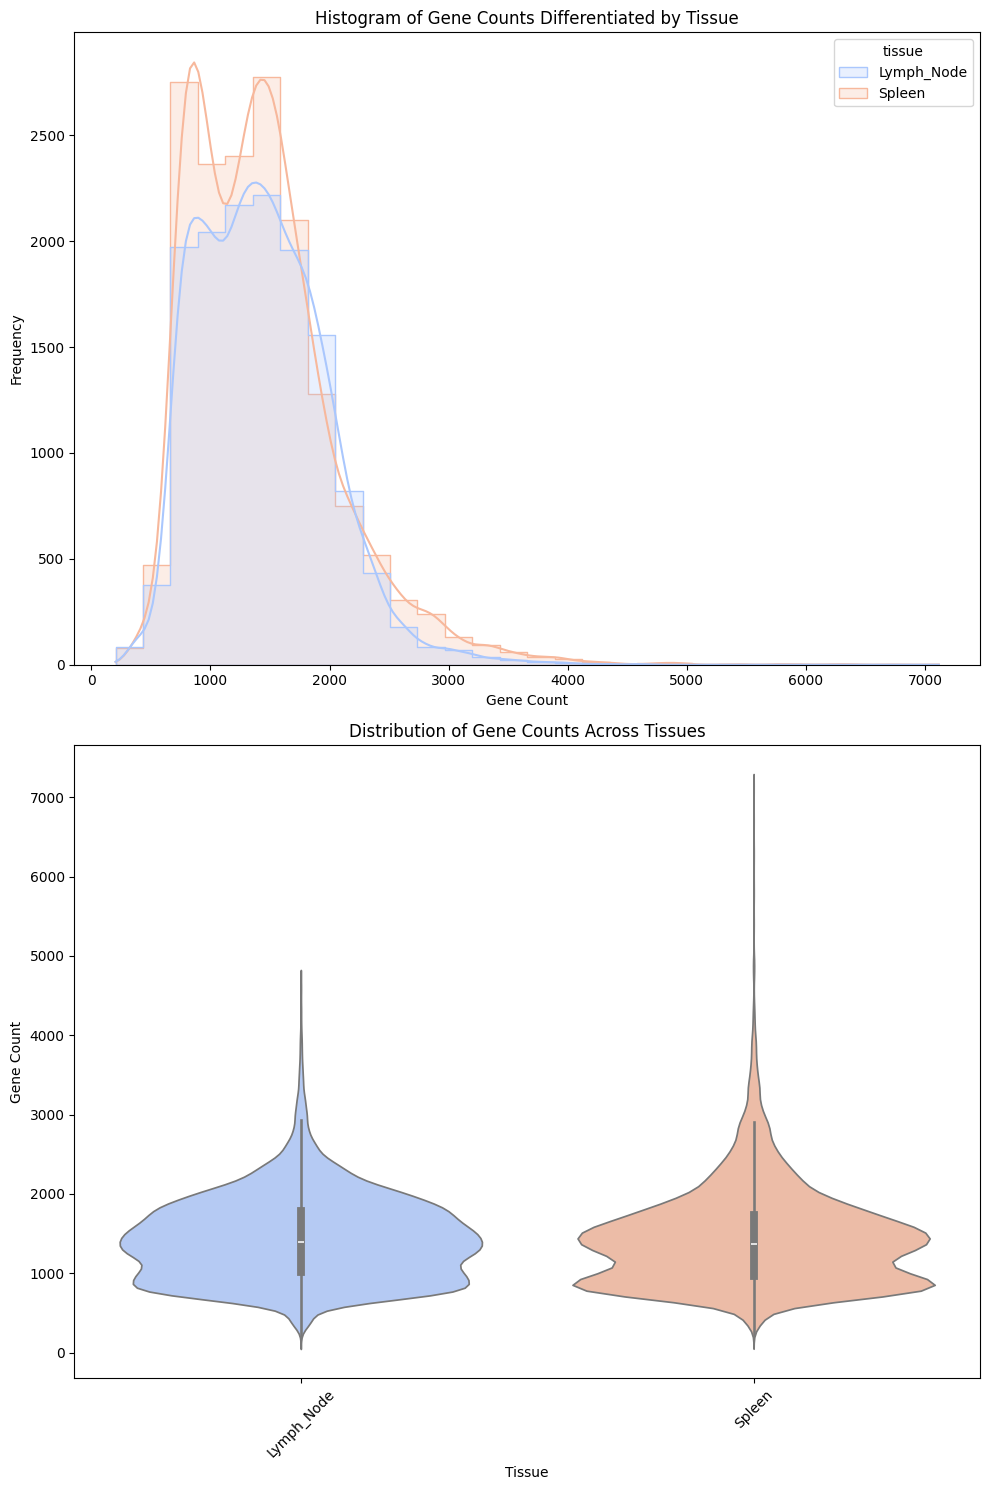

In [16]:
# Create a 1x2 subplot
fig, axes = plt.subplots(2, 1, figsize=(10, 15))

# Left plot: Histogram of gene counts, differentiated by tissue
sns.histplot(data=adata_test.obs, x="n_genes", hue="tissue", bins=30, kde=True, ax=axes[0], palette="coolwarm", element="step")
axes[0].set_xlabel("Gene Count")
axes[0].set_ylabel("Frequency")
axes[0].set_title("Histogram of Gene Counts Differentiated by Tissue")

# Right plot: Violin plot of gene count per tissue
sns.violinplot(x="tissue", y="n_genes", data=adata_test.obs, palette="coolwarm", ax=axes[1])
axes[1].set_xlabel("Tissue")
axes[1].set_ylabel("Gene Count")
axes[1].set_title("Distribution of Gene Counts Across Tissues")
axes[1].tick_params(axis="x", rotation=45)  # Rotate x-axis labels for readability

plt.tight_layout()
plt.show()

top 5 cell type

C:\Users\henry\AppData\Local\Temp\ipykernel_16060\3896891421.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ordered_cell_types = adata_test.obs.groupby("cell_types")["n_genes"].median().sort_values(ascending=False).index
C:\Users\henry\AppData\Local\Temp\ipykernel_16060\3896891421.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="cell_types", y="n_genes", data=adata_test.obs, palette="coolwarm")


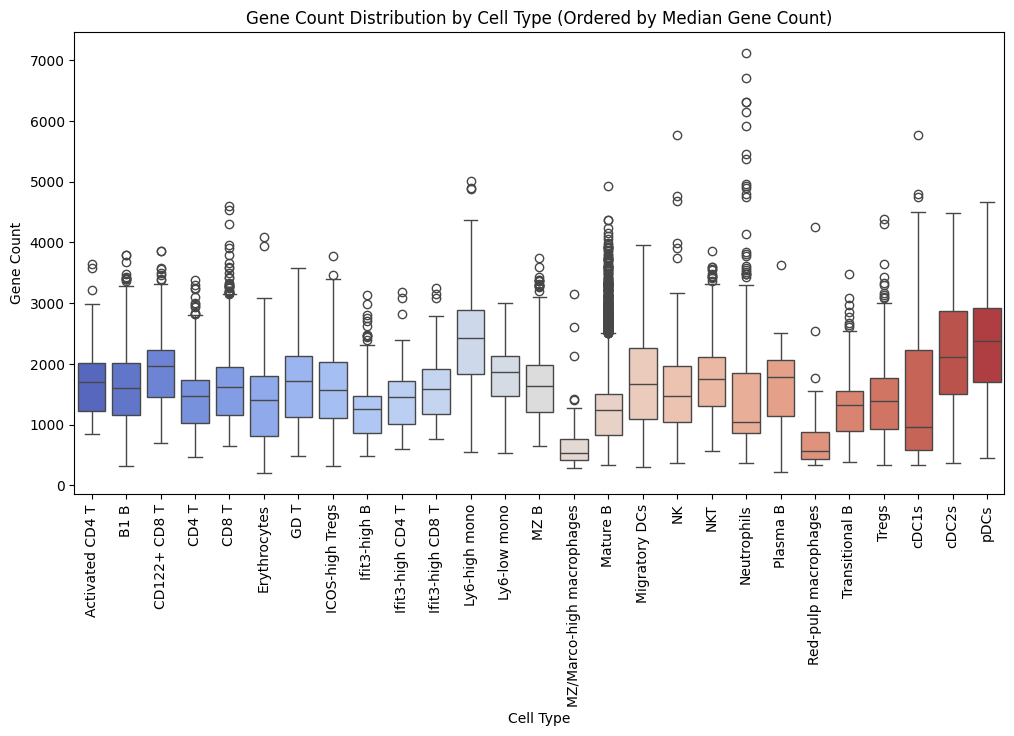

In [17]:
#  Ordenar cell_types por el promedio de n_genes de mayor a menor
ordered_cell_types = adata_test.obs.groupby("cell_types")["n_genes"].median().sort_values(ascending=False).index
adata_test.obs["cell_types"] = pd.Categorical(adata_test.obs["cell_types"], categories=ordered_cell_types, ordered=True)

# Crear la figura
plt.figure(figsize=(12, 6))

# Diagrama de cajas y bigotes
sns.boxplot(x="cell_types", y="n_genes", data=adata_test.obs, palette="coolwarm")

# Ajustes de etiquetas
plt.xlabel("Cell Type")
plt.ylabel("Gene Count")
plt.title("Gene Count Distribution by Cell Type (Ordered by Median Gene Count)")
plt.xticks(rotation=90)  # Rotar etiquetas para mejor visibilidad

# Mostrar el gráfico
plt.show()

correlations

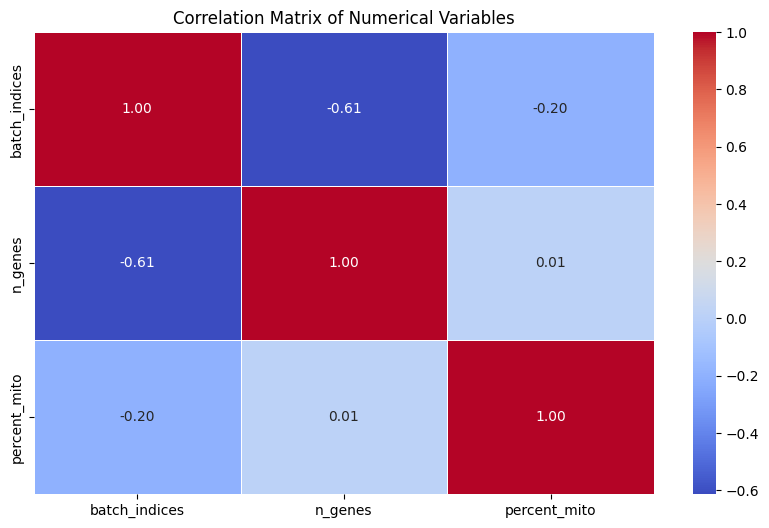

In [18]:
numerical_vars = adata_test.obs.select_dtypes(include=['number'])

# Compute correlation matrix
corr_matrix = numerical_vars.corr()

# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Titles and labels
plt.title("Correlation Matrix of Numerical Variables")
plt.show()

In [19]:
# Select 4 numerical variables (modify if needed)
num_vars = adata_test.obs.select_dtypes(include=['number']).iloc[:, :4]

# Create a 2x2 grid of scatterplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot scatterplots for variable pairs
for i, col in enumerate(num_vars.columns):
    sns.scatterplot(x=num_vars.index, y=num_vars[col], ax=axes[i], color="royalblue")
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel("Index")
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

KeyboardInterrupt: 

In [ ]:

# Select 4 different numerical variables (modify if needed)
num_vars = adata_test.obs.select_dtypes(include=['number']).iloc[:, 4:8]

# Create a 2x2 grid of regression plots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Flatten axes for easy iteration
axes = axes.flatten()

# Plot regression plots for variable pairs
for i, col in enumerate(num_vars.columns):
    sns.regplot(x=num_vars.index, y=num_vars[col], ax=axes[i], color="darkred", scatter_kws={'alpha':0.5})
    axes[i].set_title(f"Regression Plot of {col}")
    axes[i].set_xlabel("Index")
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

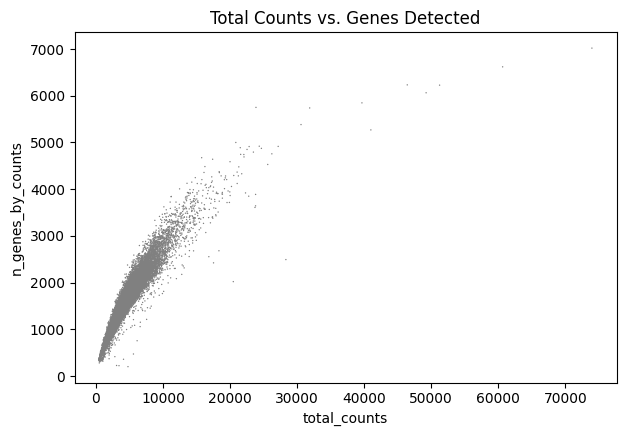

In [18]:
# 6️⃣ 🔬 Distribución de genes y cuentas
sc.pl.scatter(adata_test, x='total_counts', y='n_genes_by_counts', title="Total Counts vs. Genes Detected")
